# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [17]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf


In [19]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [21]:
# Ajustando o modelo de regressão para tip_pct:
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Obtendo valores preditivos para tip_pct:
tips['pred_tip_pct'] = model_tip_pct.fittedvalues

# Calculando os valores preditivos para tip a partir de tip_pct:
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Ajustando o modelo de regressão para tip:
model_tip = smf.ols('tip ~ net_bill', data=tips).fit()

# Calculando o R² do modelo para tip:
r_squared_tip = model_tip.rsquared

# Mostrando o resumo do modelo de tip:
model_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        19:56:40   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Mostrando o R² do modelo de tip:
print(f'R² do modelo para tip: {r_squared_tip}')

# Comparando com o R² do item 1:
r_squared_item_1 = 0.333 
print(f'Comparação do R²: Modelo ajustado no item 4 = {r_squared_tip}, Item 1 = {r_squared_item_1}')

R² do modelo para tip: 0.3325407312323705
Comparação do R²: Modelo ajustado no item 4 = 0.3325407312323705, Item 1 = 0.333


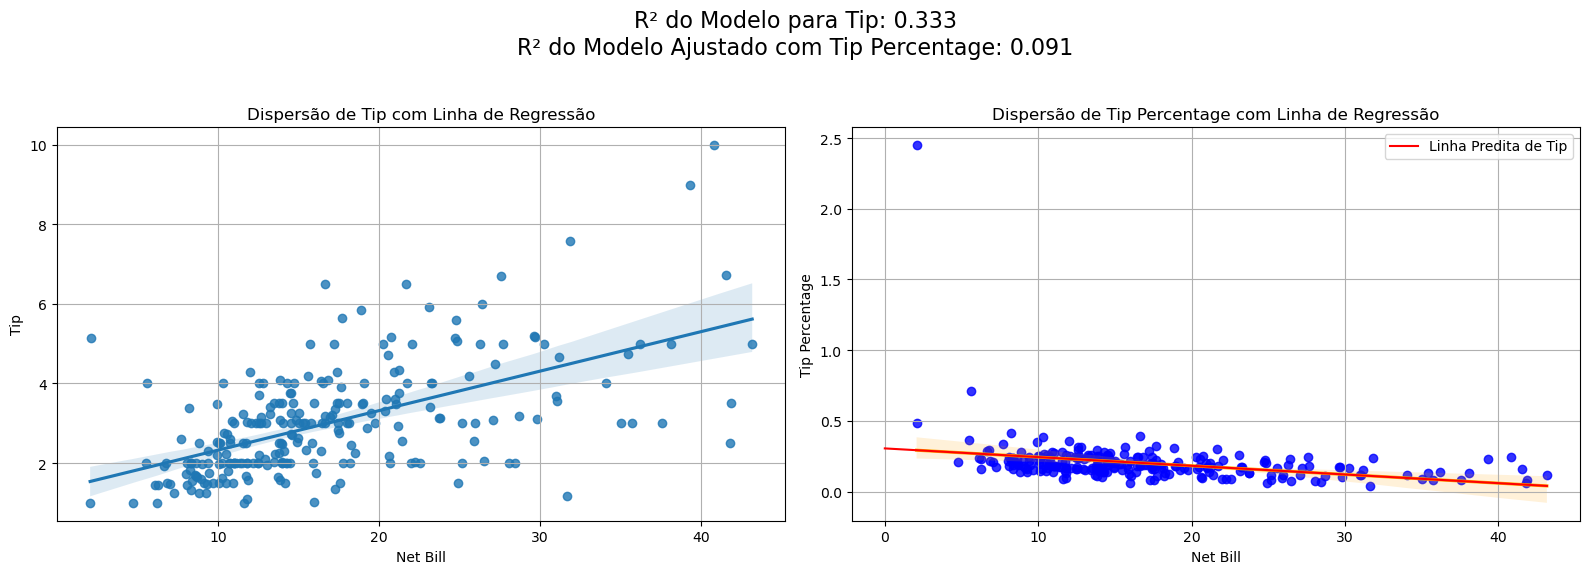

In [49]:
# Configurando os gráficos:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Dispersão e Linha de Regressão para tip explicado por net_bill:
sns.regplot(x='net_bill', y='tip', data=tips, ax=ax[0])
ax[0].set_title('Dispersão de Tip com Linha de Regressão')
ax[0].set_xlabel('Net Bill')
ax[0].set_ylabel('Tip')
ax[0].grid(True)

# Gráfico 2: Dispersão e Linha de Regressão para tip_pct explicado por net_bill:
sns.regplot(x='net_bill', y='tip_pct', data=tips, ax=ax[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
# Plotar a linha predita para tip
x = np.linspace(0, tips['net_bill'].max(), 100)
y = model_tip_pct.params.Intercept + model_tip_pct.params.net_bill * x
ax[1].plot(x, y, '-r', label='Linha Predita de Tip')
ax[1].set_title('Dispersão de Tip Percentage com Linha de Regressão')
ax[1].set_xlabel('Net Bill')
ax[1].set_ylabel('Tip Percentage')
ax[1].legend()
ax[1].grid(True)

# Adicionando comparativo do R² ao gráfico:
fig.suptitle(f'R² do Modelo para Tip: {model_tip.rsquared:.3f}\nR² do Modelo Ajustado com Tip Percentage: {model_tip_pct.rsquared:.3f}', fontsize=16)

# Ajustando layout e mostrar gráficos:
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Vemos nos gráficos e nos valores de $R^2$ a proximidade e consistência para a utilização do modelo.

### 2. Ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

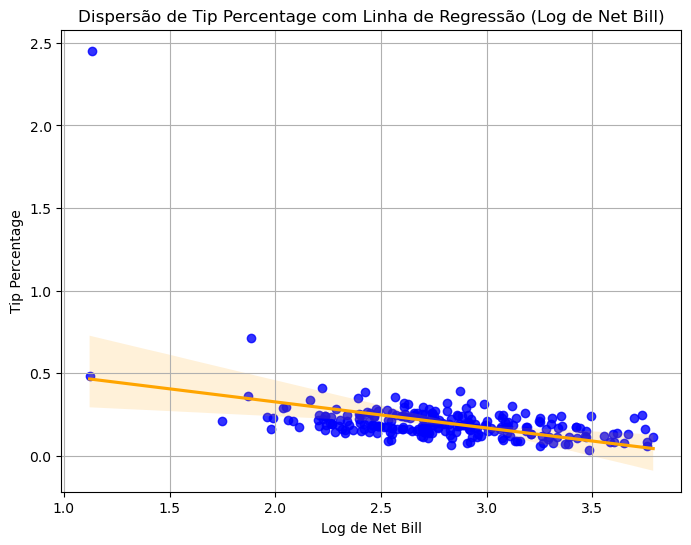

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     53.97
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           3.10e-12
Time:                        21:33:42   Log-Likelihood:                 120.88
No. Observations:                 244   AIC:                            -237.8
Df Residuals:                     242   BIC:                            -230.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6420      0.061     10.591      0.000       0.523       0.761
log_net_bill    -0.1580      0.022     -7.347      0.000      -0.200      -0.116
==============================================================================
Omnibus:                      447.126   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184309.497
Skew:                          10.120   Prob(JB):                         0.00
Kurtosis:                     136.113   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Criando a variável logarítmica de net_bill:
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # Adicionar 1 para evitar log(0)

# Ajustando o modelo de regressão para tip_pct:
model_log = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()

# Obtendo valores preditivos para tip_pct:
tips['pred_tip_pct_log'] = model_log.fittedvalues

# Configurando o gráfico:
plt.figure(figsize=(8, 6))

# Gráfico de dispersão e linha de regressão:
sns.regplot(x='log_net_bill', y='tip_pct', data=tips, scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})

# Adicionando título e rótulos:
plt.title('Dispersão de Tip Percentage com Linha de Regressão (Log de Net Bill)')
plt.xlabel('Log de Net Bill')
plt.ylabel('Tip Percentage')
plt.grid(True)

# Mostrando o gráfico:
plt.show()

# Mostrando o resumo do modelo ajustado:
model_log.summary()

###  3. Ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

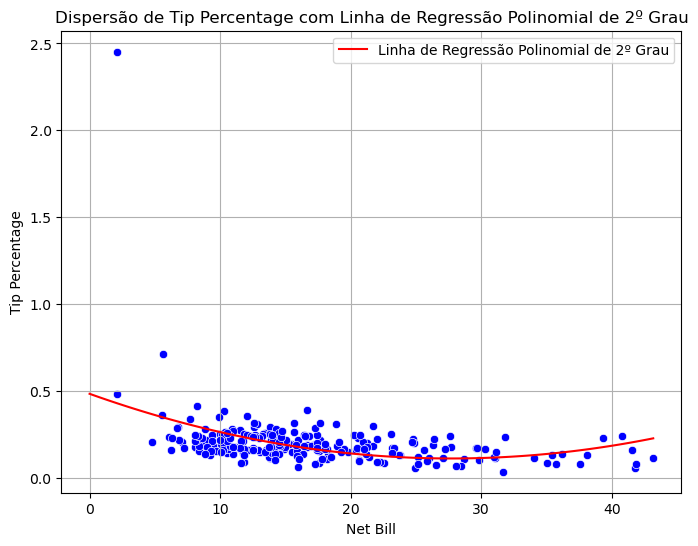

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.06e-09
Time:                        21:36:19   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4851      0.047     10.332      0.000       0.393       0.578
net_bill       -0.0268      0.005     -5.477      0.000      -0.036      -0.017
net_bill_sq     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Criando variáveis polinomiais de segundo grau:
tips['net_bill_sq'] = tips['net_bill'] ** 2

# Ajustando o modelo de regressão para tip_pct com polinômio de segundo grau:
model_poly = smf.ols('tip_pct ~ net_bill + net_bill_sq', data=tips).fit()

# Obtendo valores preditivos para tip_pct:
tips['pred_tip_pct_poly'] = model_poly.fittedvalues

# Configurando o gráfico:
plt.figure(figsize=(8, 6))

# Plotando o gráfico de dispersão:
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, color='blue')

# Gerando dados para a linha de predição:
x = np.linspace(0, tips['net_bill'].max(), 100)
y = model_poly.params.Intercept + model_poly.params.net_bill * x + model_poly.params.net_bill_sq * (x ** 2)

# Plotando a linha de regressão polinomial:
plt.plot(x, y, '-r', label='Linha de Regressão Polinomial de 2º Grau')

# Adicionando título e rótulos:
plt.title('Dispersão de Tip Percentage com Linha de Regressão Polinomial de 2º Grau')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.legend()
plt.grid(True)

# Mostrando o gráfico:
plt.show()

# Mostrando o resumo do modelo ajustado:
model_poly.summary()


###  4. Ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

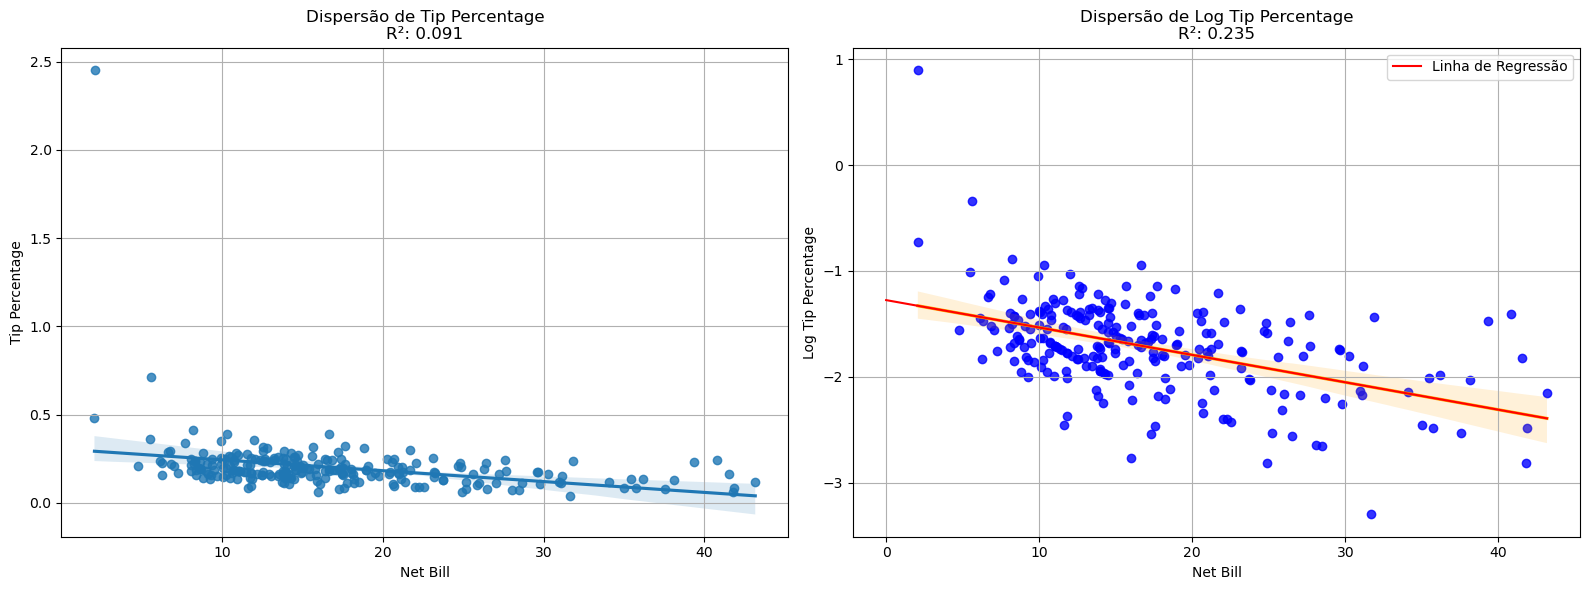

Resumo do Modelo para tip_pct:
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        21:37:52   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053

In [58]:
# Evitando log de valores zero:
tips['log_tip_pct'] = np.log(tips['tip_pct'] + 1e-9)  # Adiciona um valor pequeno para evitar log(0)

# Ajustando o modelo de regressão para log_tip_pct em função de net_bill:
model_log_tip_pct = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()

# Obtendo valores preditivos para log_tip_pct:
tips['pred_log_tip_pct'] = model_log_tip_pct.fittedvalues

# Calculando o valor predito para tip_pct:
tips['pred_tip_pct_from_log'] = np.exp(tips['pred_log_tip_pct']) - 1e-9

# Calculando o R² do modelo para tip_pct:
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
r_squared_tip_pct = model_tip_pct.rsquared

# Calculando o R² do modelo ajustado com log_tip_pct:
r_squared_log_tip_pct = model_log_tip_pct.rsquared

# Configurando os gráficos:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Dispersão e Linha de Regressão para tip_pct explicado por net_bill:
sns.regplot(x='net_bill', y='tip_pct', data=tips, ax=ax[0])
ax[0].set_title(f'Dispersão de Tip Percentage\nR²: {r_squared_tip_pct:.3f}')
ax[0].set_xlabel('Net Bill')
ax[0].set_ylabel('Tip Percentage')
ax[0].grid(True)

# Gráfico 2: Dispersão e Linha de Regressão para log_tip_pct explicado por net_bill:
sns.regplot(x='net_bill', y='log_tip_pct', data=tips, ax=ax[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
# Plotar a linha predita para tip_pct
x = np.linspace(0, tips['net_bill'].max(), 100)
y = model_log_tip_pct.params.Intercept + model_log_tip_pct.params.net_bill * x
plt.plot(x, y, '-r', label='Linha de Regressão')
ax[1].set_title(f'Dispersão de Log Tip Percentage\nR²: {r_squared_log_tip_pct:.3f}')
ax[1].set_xlabel('Net Bill')
ax[1].set_ylabel('Log Tip Percentage')
ax[1].legend()
ax[1].grid(True)

# Ajustando layout e mostrando gráficos:
plt.tight_layout()
plt.show()

# Mostrando o resumo dos modelos ajustados:
print("Resumo do Modelo para tip_pct:")
print(model_tip_pct.summary())
print("\nResumo do Modelo para log_tip_pct:")
print(model_log_tip_pct.summary())


###  5. Ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

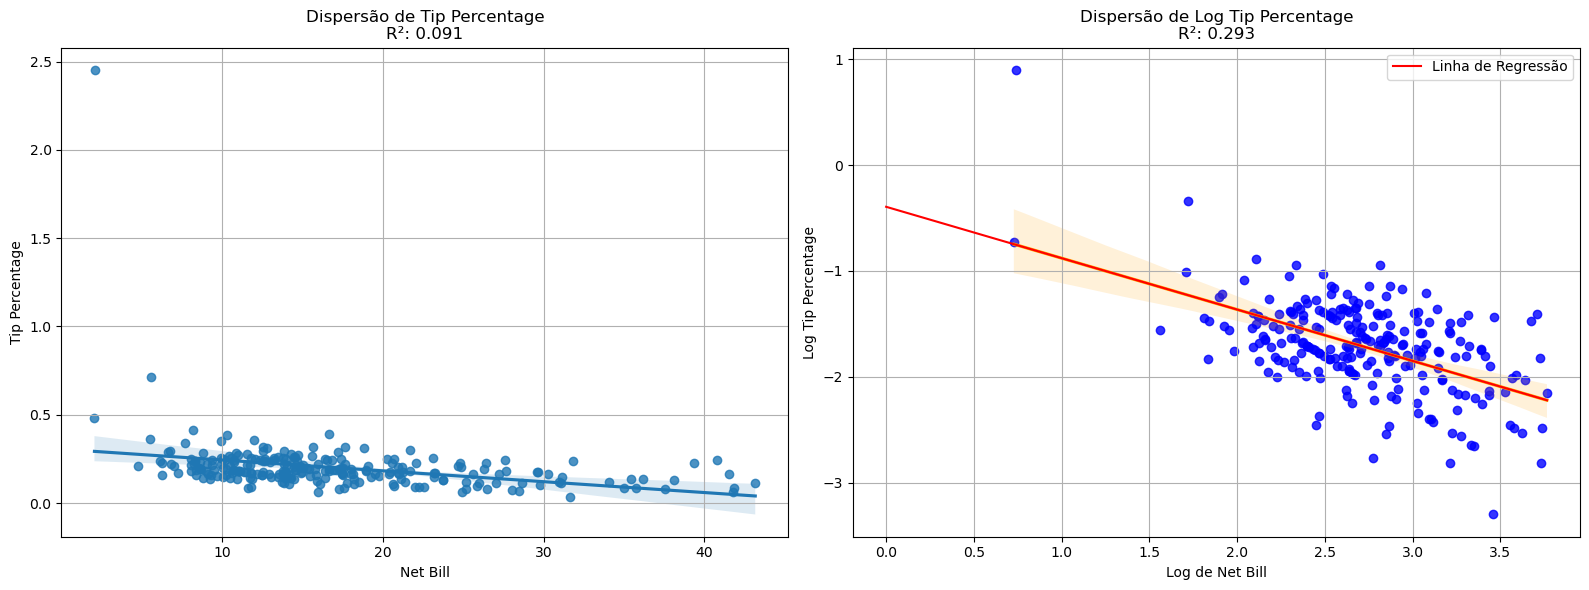

Resumo do Modelo para tip_pct:
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        21:39:04   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053

In [61]:
# Evitando log de valores zero:
tips['log_tip_pct'] = np.log(tips['tip_pct'] + 1e-9)  # Adiciona um valor pequeno para evitar log(0)
tips['log_net_bill'] = np.log(tips['net_bill'] + 1e-9)  # Adiciona um valor pequeno para evitar log(0)

# Ajustando o modelo de regressão para log_tip_pct em função de log_net_bill:
model_log_log = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

# Obtendo valores preditivos para log_tip_pct:
tips['pred_log_tip_pct'] = model_log_log.fittedvalues

# Calculando o valor predito para tip_pct:
tips['pred_tip_pct_from_log_log'] = np.exp(tips['pred_log_tip_pct']) - 1e-9

# Calculando o R² do modelo ajustado:
r_squared_log_log = model_log_log.rsquared

# Calculando o R² do modelo para tip_pct:
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
r_squared_tip_pct = model_tip_pct.rsquared

# Configurando os gráficos:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Dispersão e Linha de Regressão para tip_pct explicado por net_bill:
sns.regplot(x='net_bill', y='tip_pct', data=tips, ax=ax[0])
ax[0].set_title(f'Dispersão de Tip Percentage\nR²: {r_squared_tip_pct:.3f}')
ax[0].set_xlabel('Net Bill')
ax[0].set_ylabel('Tip Percentage')
ax[0].grid(True)

# Gráfico 2: Dispersão e Linha de Regressão para log_tip_pct explicado por log_net_bill:
sns.regplot(x='log_net_bill', y='log_tip_pct', data=tips, ax=ax[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
# Plotar a linha predita para tip_pct
x = np.linspace(0, tips['log_net_bill'].max(), 100)
y = model_log_log.params.Intercept + model_log_log.params.log_net_bill * x
plt.plot(x, y, '-r', label='Linha de Regressão')
ax[1].set_title(f'Dispersão de Log Tip Percentage\nR²: {r_squared_log_log:.3f}')
ax[1].set_xlabel('Log de Net Bill')
ax[1].set_ylabel('Log Tip Percentage')
ax[1].legend()
ax[1].grid(True)

# Ajustando layout e mostrar gráficos:
plt.tight_layout()
plt.show()

# Mostrando o resumo dos modelos ajustados:
print("Resumo do Modelo para tip_pct:")
print(model_tip_pct.summary())
print("\nResumo do Modelo para log_tip_pct:")
print(model_log_log.summary())


###  6. Qual modelo resultou no melhor ajuste?

In [64]:
# Mostrando os R² calculados:
print(f"R² do modelo para tip_pct ~ net_bill: {r_squared_tip_pct:.3f}")
print(f"R² do modelo para log_tip_pct ~ log_net_bill: {r_squared_log_log:.3f}")

# Comparando os R²:
if r_squared_log_log > r_squared_tip_pct:
    print("O modelo com log_tip_pct ~ log_net_bill tem um melhor ajuste.")
else:
    print("O modelo com tip_pct ~ net_bill tem um melhor ajuste.")


R² do modelo para tip_pct ~ net_bill: 0.091
R² do modelo para log_tip_pct ~ log_net_bill: 0.293
O modelo com log_tip_pct ~ log_net_bill tem um melhor ajuste.
